In [99]:
!pip install facenet-pytorch

In [100]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import torch
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Running on device: {}'.format(device))

Running on device: cuda


In [101]:
# Create face detector
mtcnn = MTCNN(select_largest=False, device=device)

In [102]:
# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [103]:
# Make sure all files in data folder are jpgs

folder_path = 'data'  # Replace with the path to your folder containing the image files

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the file is a regular file and not a directory
    if os.path.isfile(file_path):
        # Check the current file extension
        _, file_extension = os.path.splitext(filename)

        if file_extension.lower() != '.jpg':
            # Load the image
            img = Image.open(file_path)

            # Convert the image to RGB mode (remove alpha channel)
            img = img.convert('RGB')

            # Create a new filename with ".jpg" extension
            new_filename = os.path.splitext(filename)[0] + '.jpg'
            new_file_path = os.path.join(folder_path, new_filename)

            # Save the image as ".jpg"
            img.save(new_file_path, 'JPEG')

            # Optionally, remove the original file
            os.remove(file_path)

In [104]:

embeddings = []
images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):

  # Load an image
  file_path = os.path.join(folder_path, filename)
  frame = Image.open(file_path)

  # Detect face
  face = mtcnn(frame)

  # Calculate embedding (unsqueeze to add batch dimension)
  embedding = resnet(face.unsqueeze(0))

  embeddings.append(embedding)
  images.append(frame)




In [105]:
len(embeddings)

6

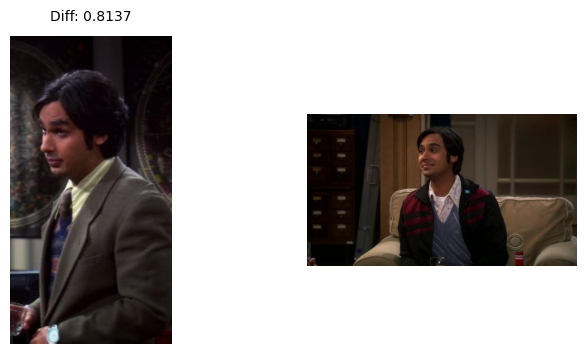

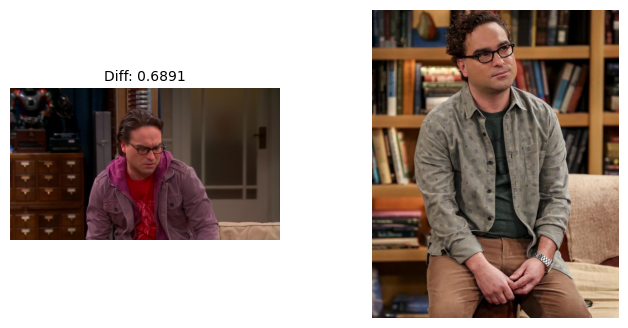

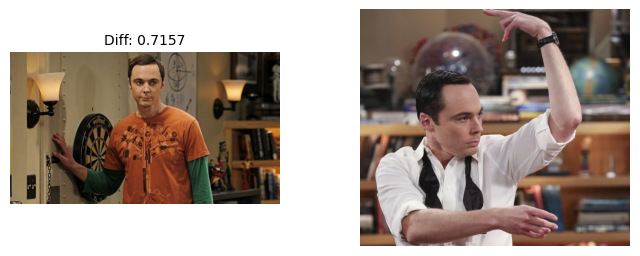

In [106]:
# Results for the same person

idx_1 = 0
idx_2 = 2

# Create a figure for displaying the first 2 images and their difference in "embedding" values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

# Display the first image
ax1.imshow(images[idx_1])
ax1.axis('off')

# Display the second image
ax2.imshow(images[idx_2])
ax2.axis('off')

# Calculate and display the difference in "embedding" values
diff = (embeddings[idx_1] - embeddings[idx_2]).norm().item()
text_x = 0.5  # x-coordinate centered between the images
text_y = 1.05  # Adjust this value for vertical positioning
ax1.text(text_x, text_y, f'Diff: {diff:.4f}', ha='center', transform=ax1.transAxes)

plt.show()


idx_1 = 1
idx_2 = 3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

ax1.imshow(images[idx_1])
ax1.axis('off')

ax2.imshow(images[idx_2])
ax2.axis('off')

diff = (embeddings[idx_1] - embeddings[idx_2]).norm().item()
text_x = 0.5  # x-coordinate centered between the images
text_y = 1.05  # Adjust this value for vertical positioning
ax1.text(text_x, text_y, f'Diff: {diff:.4f}', ha='center', transform=ax1.transAxes)

plt.show()

idx_1 = 4
idx_2 = 5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

ax1.imshow(images[idx_1])
ax1.axis('off')

ax2.imshow(images[idx_2])
ax2.axis('off')

diff = (embeddings[idx_1] - embeddings[idx_2]).norm().item()
text_x = 0.5  # x-coordinate centered between the images
text_y = 1.05  # Adjust this value for vertical positioning
ax1.text(text_x, text_y, f'Diff: {diff:.4f}', ha='center', transform=ax1.transAxes)

plt.show()

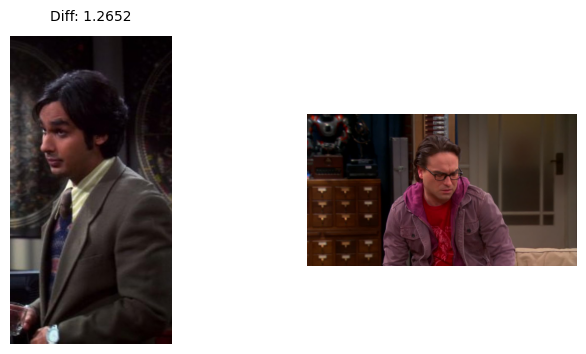

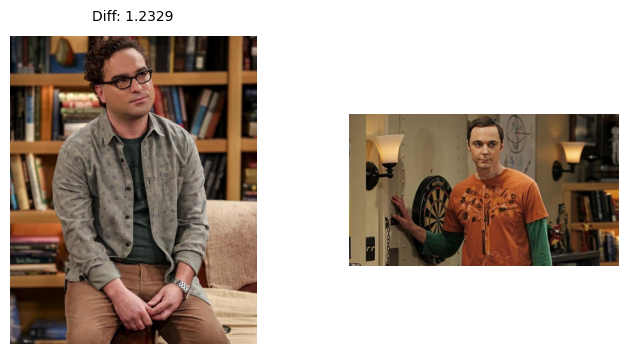

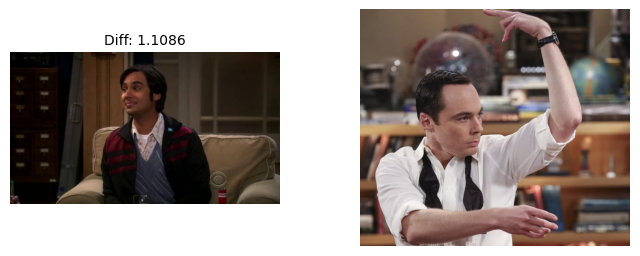

In [107]:
# Results for different people

idx_1 = 0
idx_2 = 1

# Create a figure for displaying the first 2 images and their difference in "embedding" values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

# Display the first image
ax1.imshow(images[idx_1])
ax1.axis('off')

# Display the second image
ax2.imshow(images[idx_2])
ax2.axis('off')

# Calculate and display the difference in "embedding" values
diff = (embeddings[idx_1] - embeddings[idx_2]).norm().item()
text_x = 0.5  # x-coordinate centered between the images
text_y = 1.05  # Adjust this value for vertical positioning
ax1.text(text_x, text_y, f'Diff: {diff:.4f}', ha='center', transform=ax1.transAxes)

plt.show()


idx_1 = 3
idx_2 = 4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

ax1.imshow(images[idx_1])
ax1.axis('off')

ax2.imshow(images[idx_2])
ax2.axis('off')

diff = (embeddings[idx_1] - embeddings[idx_2]).norm().item()
text_x = 0.5  # x-coordinate centered between the images
text_y = 1.05  # Adjust this value for vertical positioning
ax1.text(text_x, text_y, f'Diff: {diff:.4f}', ha='center', transform=ax1.transAxes)

plt.show()

idx_1 = 2
idx_2 = 5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

ax1.imshow(images[idx_1])
ax1.axis('off')

ax2.imshow(images[idx_2])
ax2.axis('off')

diff = (embeddings[idx_1] - embeddings[idx_2]).norm().item()
text_x = 0.5  # x-coordinate centered between the images
text_y = 1.05  # Adjust this value for vertical positioning
ax1.text(text_x, text_y, f'Diff: {diff:.4f}', ha='center', transform=ax1.transAxes)

plt.show()